In [194]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=9,7

In [195]:
h=1.28*20
splot = 1500
nwait = 40E6
dt = h*splot
t_therm = nwait*h

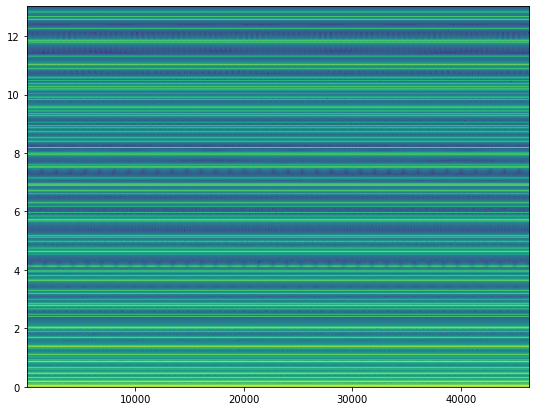

In [196]:
_fname = './outfiles1/testOut_000Y1.txt'
_fid = open(_fname)
_amplitude0 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude0)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec0,freq,t,_)=plt.specgram(_amplitude0[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

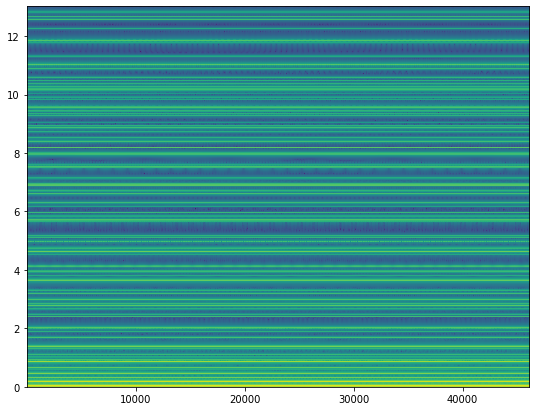

In [197]:
_fname = './outfiles1/testOut_001Y1.txt'
_fid = open(_fname)
_amplitude1 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude1)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec1,freq,t,_)=plt.specgram(_amplitude1[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

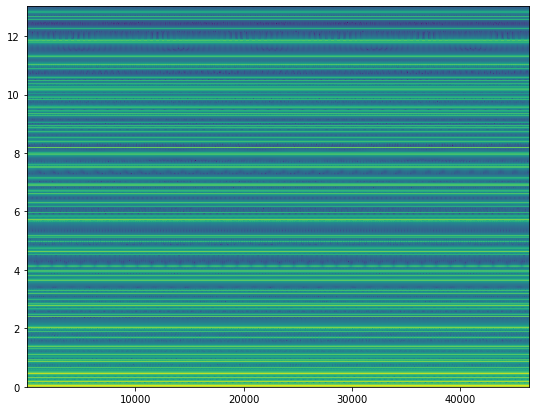

In [198]:
_fname = './outfiles1/testOut_002Y1.txt'
_fid = open(_fname)
_amplitude2 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude2)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec2,freq,t,_)=plt.specgram(_amplitude2[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

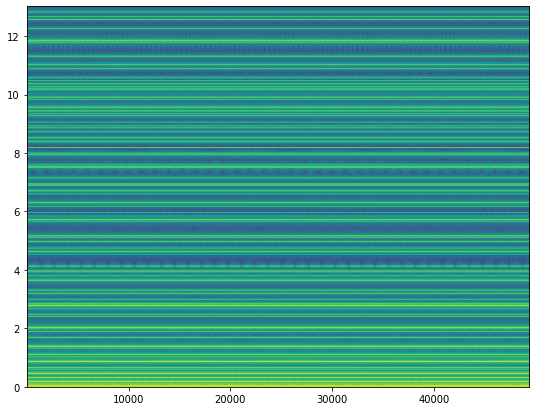

In [199]:
_fname = './outfiles1/testOut_003Y1.txt'
_fid = open(_fname)
_amplitude3 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude3)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec3,freq,t,_)=plt.specgram(_amplitude3[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

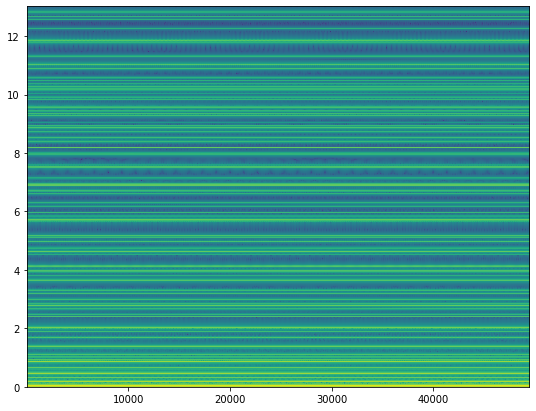

In [200]:
_fname = './outfiles1/testOut_004Y1.txt'
_fid = open(_fname)
_amplitude4 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude4)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec4,freq,t,_)=plt.specgram(_amplitude4[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

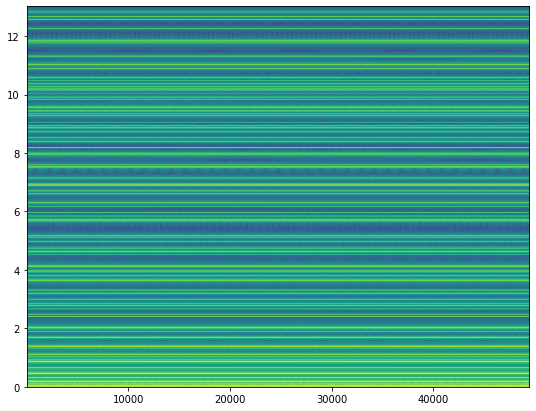

In [201]:
_fname = './outfiles1/testOut_005Y1.txt'
_fid = open(_fname)
_amplitude5 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude5)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec5,freq,t,_)=plt.specgram(_amplitude5[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

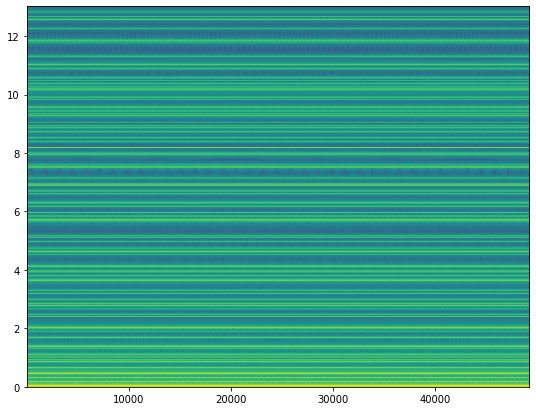

In [202]:
_fname = './outfiles1/testOut_006Y1.txt'
_fid = open(_fname)
_amplitude6 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude6)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec6,freq,t,_)=plt.specgram(_amplitude6[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

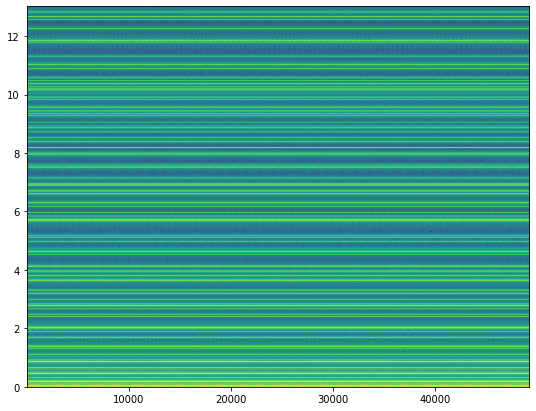

In [203]:
_fname = './outfiles1/testOut_007Y1.txt'
_fid = open(_fname)
_amplitude7 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude7)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec7,freq,t,_)=plt.specgram(_amplitude7[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

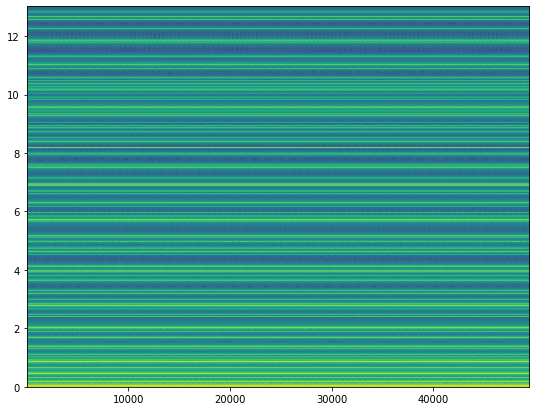

In [204]:
_fname = './outfiles1/testOut_008Y1.txt'
_fid = open(_fname)
_amplitude8 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude8)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec8,freq,t,_)=plt.specgram(_amplitude8[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

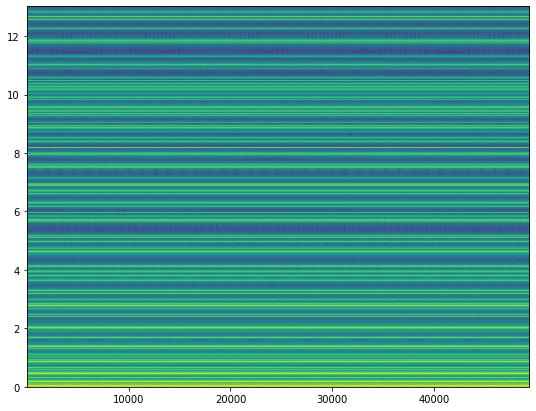

In [205]:
_fname = './outfiles1/testOut_009Y1.txt'
_fid = open(_fname)
_amplitude9 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude9)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec9,freq,t,_)=plt.specgram(_amplitude9[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

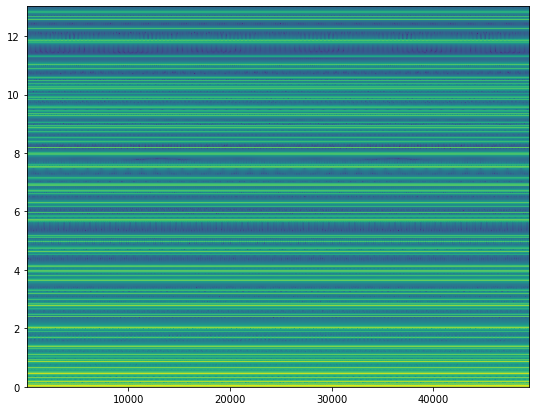

In [206]:
_fname = './outfiles1/testOut_010Y1.txt'
_fid = open(_fname)
_amplitude10 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude10)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec10,freq,t,_)=plt.specgram(_amplitude10[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

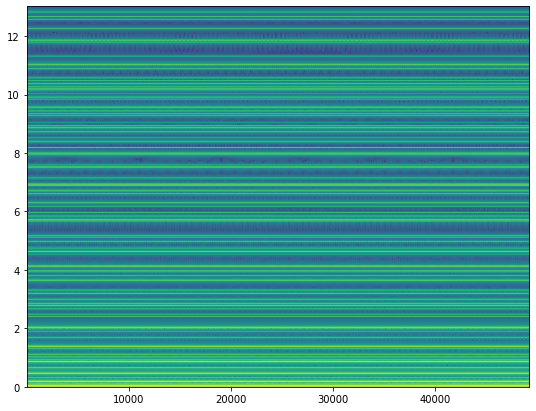

In [207]:
_fname = './outfiles1/testOut_011Y1.txt'
_fid = open(_fname)
_amplitude11 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude11)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec11,freq,t,_)=plt.specgram(_amplitude11[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

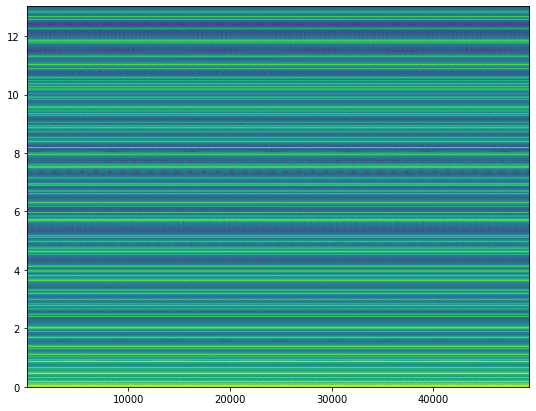

In [208]:
_fname = './outfiles1/testOut_012Y1.txt'
_fid = open(_fname)
_amplitude12 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude12)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec12,freq,t,_)=plt.specgram(_amplitude12[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

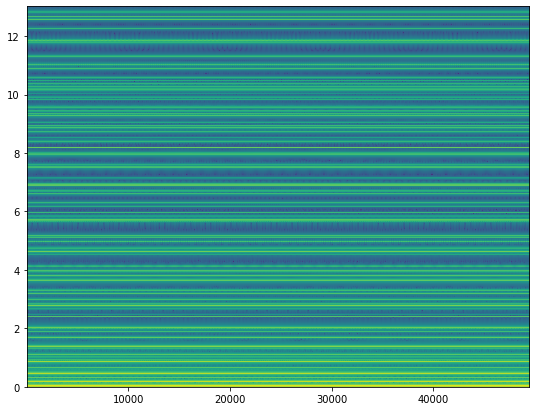

In [209]:
_fname = './outfiles1/testOut_013Y1.txt'
_fid = open(_fname)
_amplitude13 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude13)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec13,freq,t,_)=plt.specgram(_amplitude13[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

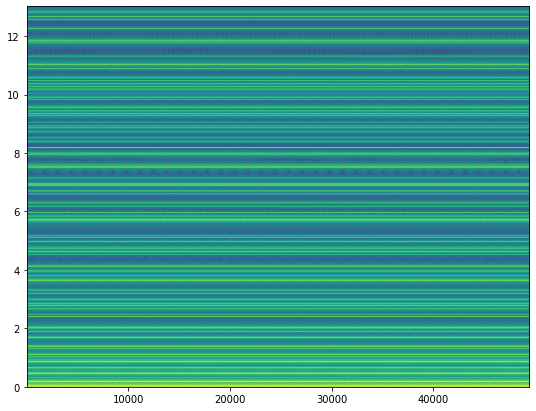

In [210]:
_fname = './outfiles1/testOut_014Y1.txt'
_fid = open(_fname)
_amplitude14 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude14)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec14,freq,t,_)=plt.specgram(_amplitude14[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

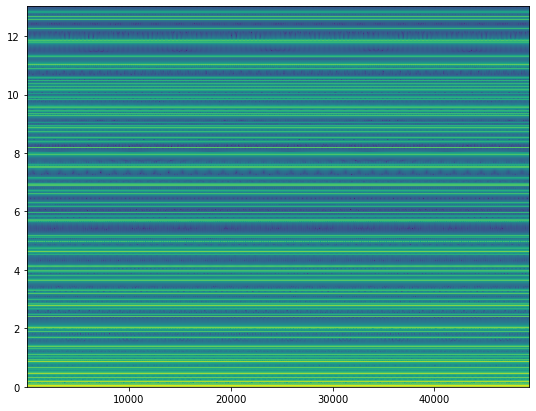

In [211]:
_fname = './outfiles1/testOut_015Y1.txt'
_fid = open(_fname)
_amplitude15 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude15)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec15,freq,t,_)=plt.specgram(_amplitude15[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

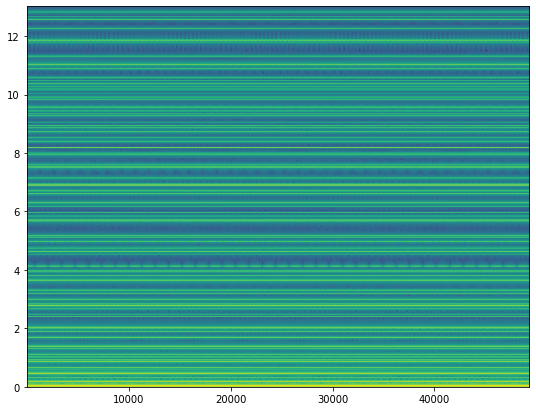

In [212]:
_fname = './outfiles1/testOut_016Y1.txt'
_fid = open(_fname)
_amplitude16 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude16)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec16,freq,t,_)=plt.specgram(_amplitude16[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

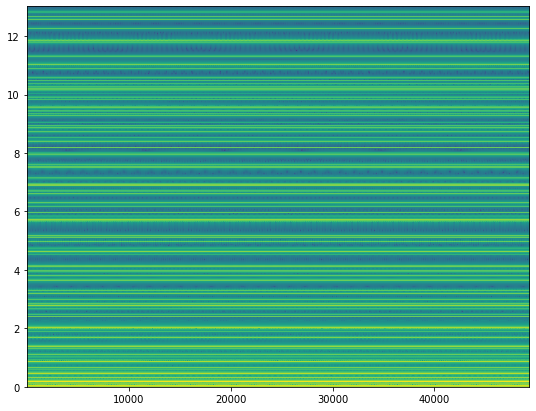

In [213]:
_fname = './outfiles1/testOut_017Y1.txt'
_fid = open(_fname)
_amplitude17 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude17)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec17,freq,t,_)=plt.specgram(_amplitude17[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

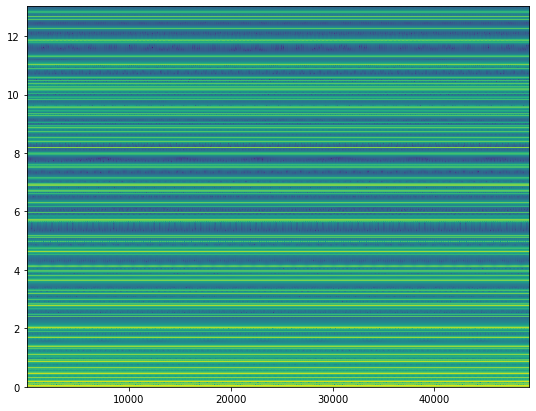

In [214]:
_fname = './outfiles1/testOut_018Y1.txt'
_fid = open(_fname)
_amplitude18 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude18)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec18,freq,t,_)=plt.specgram(_amplitude18[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

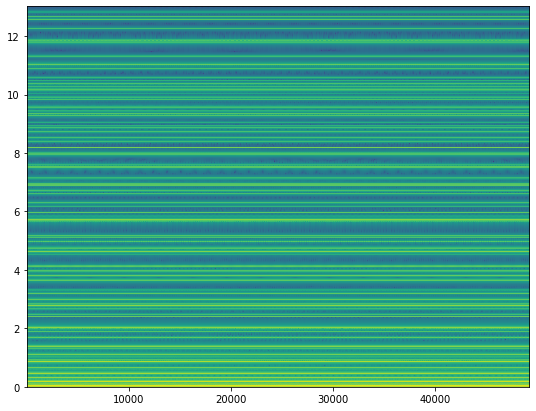

In [215]:
_fname = './outfiles1/testOut_019Y1.txt'
_fid = open(_fname)
_amplitude19 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude19)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec19,freq,t,_)=plt.specgram(_amplitude19[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

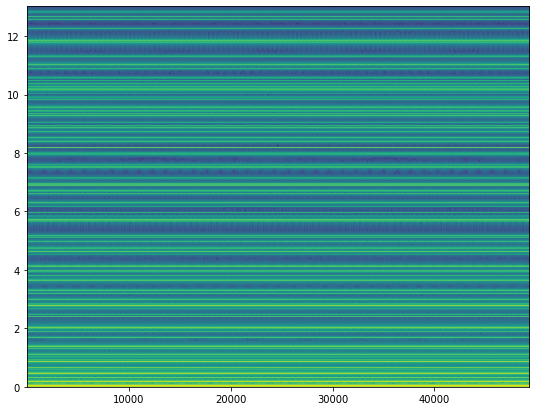

In [216]:
_fname = './outfiles1/testOut_020Y1.txt'
_fid = open(_fname)
_amplitude20 = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_amplitude20)
t = np.arange(N_time_steps)*dt
_r=t>t_therm

_NFFT=128*16

_dt=dt/1e6
(spec20,freq,t,_)=plt.specgram(_amplitude20[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')

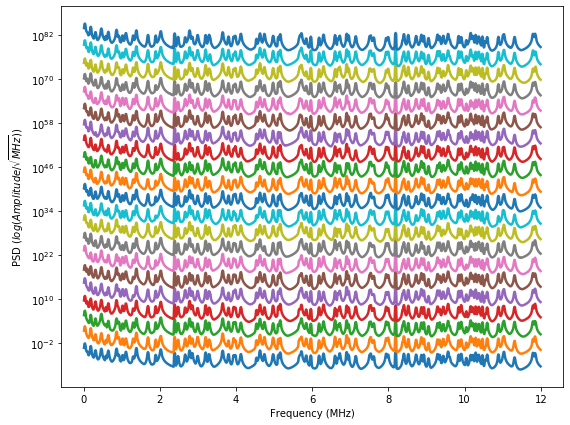

In [243]:
df=freq[1]-freq[0]

constant=10

x0=np.mean(spec0,axis=1)
x1=np.mean(spec1,axis=1)
x2=np.mean(spec2,axis=1)
x3=np.mean(spec3,axis=1)
x4=np.mean(spec4,axis=1)
x5=np.mean(spec5,axis=1)
x6=np.mean(spec6,axis=1)
x7=np.mean(spec7,axis=1)
x8=np.mean(spec8,axis=1)
x9=np.mean(spec9,axis=1)
x10=np.mean(spec10,axis=1)
x11=np.mean(spec11,axis=1)
x12=np.mean(spec12,axis=1)
x13=np.mean(spec13,axis=1)
x14=np.mean(spec14,axis=1)
x15=np.mean(spec15,axis=1)
x16=np.mean(spec16,axis=1)
x17=np.mean(spec17,axis=1)
x18=np.mean(spec18,axis=1)
x19=np.mean(spec19,axis=1)
x20=np.mean(spec20,axis=1)

plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD $(log(Amplitude/\sqrt{MHz}))$')
r=(freq>0)&(freq<12)
plt.semilogy(freq[r],np.sqrt(x0[r])*np.exp(0*constant),
             freq[r],np.sqrt(x1[r])*np.exp(1*constant),
             freq[r],np.sqrt(x2[r])*np.exp(2*constant),
             freq[r],np.sqrt(x3[r])*np.exp(3*constant),
             freq[r],np.sqrt(x4[r])*np.exp(4*constant),
             freq[r],np.sqrt(x5[r])*np.exp(5*constant),
             freq[r],np.sqrt(x6[r])*np.exp(6*constant),
             freq[r],np.sqrt(x7[r])*np.exp(7*constant),
             freq[r],np.sqrt(x8[r])*np.exp(8*constant),
             freq[r],np.sqrt(x9[r])*np.exp(9*constant),
             freq[r],np.sqrt(x10[r])*np.exp(10*constant),
             freq[r],np.sqrt(x11[r])*np.exp(11*constant),
             freq[r],np.sqrt(x12[r])*np.exp(12*constant),
             freq[r],np.sqrt(x13[r])*np.exp(13*constant),
             freq[r],np.sqrt(x14[r])*np.exp(14*constant),
             freq[r],np.sqrt(x15[r])*np.exp(15*constant),
             freq[r],np.sqrt(x16[r])*np.exp(16*constant),
             freq[r],np.sqrt(x17[r])*np.exp(17*constant),
             freq[r],np.sqrt(x18[r])*np.exp(18*constant),
             freq[r],np.sqrt(x19[r])*np.exp(19*constant),
             freq[r],np.sqrt(x20[r])*np.exp(20*constant),lw=2.5)
plt.draw()
plt.show()